# 1. Image Filters

This notebook demonstrates the application of various image filters as specified in the assignment. We will cover:

*   Reading and preparing images.
*   Applying a 3x3 Mean filter for smoothing.
*   Applying gradient filters (Roberts, Prewitt, Sobel) for edge detection using `cv2.filter2D`.
*   Comparing the custom Sobel filter implementation with OpenCV's built-in `cv2.Sobel` function.

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display multiple images for comparison
def show_images(images, titles, figsize=(15, 8)):
    """Displays a list of images with their corresponding titles."""
    if len(images) != len(titles):
        print("The number of images and titles must be the same.")
        return
    
    n = len(images)
    plt.figure(figsize=figsize)
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, n, i + 1)
        plt.imshow(image, cmap='gray', vmin=0, vmax=255)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

### Read the two images (image1.jpg & image2.jpg)


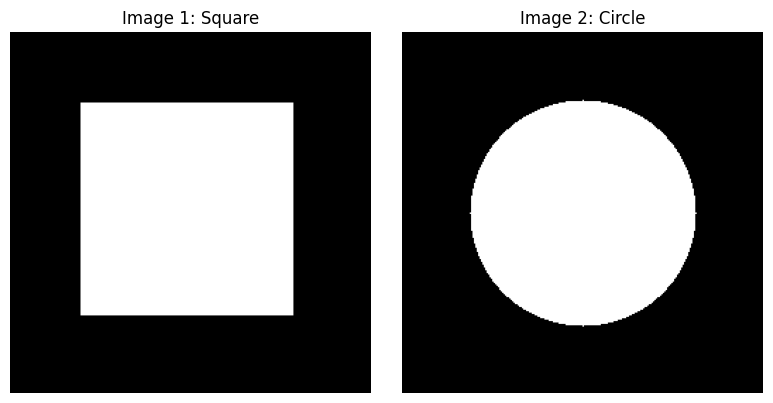

In [5]:
# Create image 1: A white square on a black background
image1 = np.zeros((256, 256), dtype=np.uint8)
cv2.rectangle(image1, (50, 50), (200, 200), 255, -1)

# Create image 2: A white circle on a black background
image2 = np.zeros((256, 256), dtype=np.uint8)
cv2.circle(image2, (128, 128), 80, 255, -1)

# Display the original images
show_images([image1, image2], ['Image 1: Square', 'Image 2: Circle'], figsize=(8, 4))

### Apply a 3 x 3 mean filter on it.

A mean filter is a simple smoothing filter. It replaces each pixel's value with the average (mean) value of its neighbors, including itself. This has the effect of reducing noise and blurring the image.

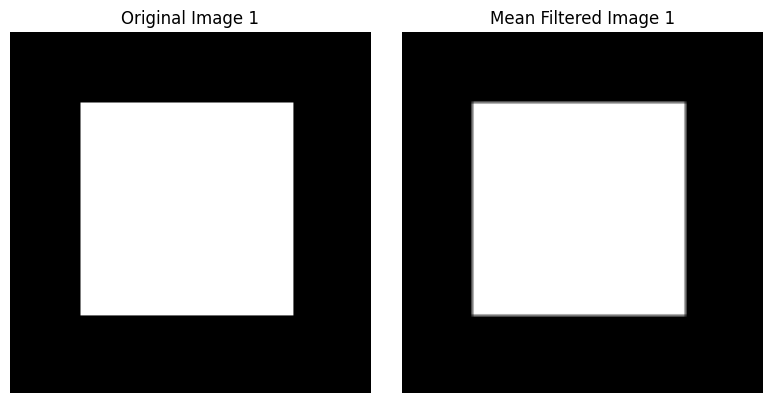

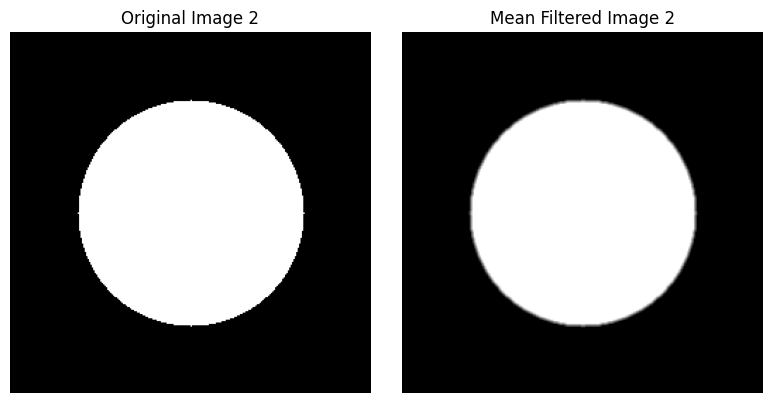

In [6]:
# Define the 3x3 mean filter kernel
mean_kernel = np.ones((3, 3), np.float32) / 9

# Apply the mean filter to both images using cv2.filter2D
# ddepth=-1 means the output image will have the same depth as the source
image1_mean = cv2.filter2D(src=image1, ddepth=-1, kernel=mean_kernel)
image2_mean = cv2.filter2D(src=image2, ddepth=-1, kernel=mean_kernel)

# Display the results
show_images([image1, image1_mean], ['Original Image 1', 'Mean Filtered Image 1'], figsize=(8, 4))
show_images([image2, image2_mean], ['Original Image 2', 'Mean Filtered Image 2'], figsize=(8, 4))

### Apply the following gradient filters: Roberts, Prewitt, and Sobel.

Gradient filters are used for edge detection. They work by calculating the gradient of the image intensity at each point, which highlights regions of high-intensity change (i.e., edges).

#### Roberts Operator
The Roberts operator uses a pair of 2x2 kernels to compute diagonal differences.

$$ 
G_1 = \begin{bmatrix} -1 & 0 \\ 0 & 1 \end{bmatrix} \qquad G_2 = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix} 
$$

In [ ]:
# Define Roberts kernels
roberts_k1 = np.array([[-1, 0], [0, 1]], dtype=np.float32)
roberts_k2 = np.array([[0, -1], [1, 0]], dtype=np.float32)

# Apply kernels using cv2.filter2D. Use CV_64F for precision to avoid data loss.
img1_roberts1 = cv2.filter2D(image1, cv2.CV_64F, roberts_k1)
img1_roberts2 = cv2.filter2D(image1, cv2.CV_64F, roberts_k2)

# Calculate the magnitude of the gradient
img1_roberts_mag = np.sqrt(img1_roberts1**2 + img1_roberts2**2)

# Convert results to a displayable format (0-255 uint8)
img1_roberts1_abs = cv2.convertScaleAbs(img1_roberts1)
img1_roberts2_abs = cv2.convertScaleAbs(img1_roberts2)
img1_roberts_mag_abs = cv2.convertScaleAbs(img1_roberts_mag)

# Display the results for Image 1
show_images([img1_roberts1_abs, img1_roberts2_abs, img1_roberts_mag_abs], 
            ['Roberts G1', 'Roberts G2', 'Roberts Magnitude'], figsize=(12, 4))

#### Prewitt Operator
The Prewitt operator uses 3x3 kernels to detect horizontal and vertical edges.

$$ 
G_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix} \qquad G_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} 
$$

In [ ]:
# Define Prewitt kernels (as per the image: G_y first, G_x second)
prewitt_gy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
prewitt_gx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)

# Apply kernels to Image 1
img1_prewitt_y = cv2.filter2D(image1, cv2.CV_64F, prewitt_gy)
img1_prewitt_x = cv2.filter2D(image1, cv2.CV_64F, prewitt_gx)

# Calculate the magnitude of the gradient
img1_prewitt_mag = cv2.magnitude(img1_prewitt_x, img1_prewitt_y)

# Convert to displayable format
img1_prewitt_x_abs = cv2.convertScaleAbs(img1_prewitt_x)
img1_prewitt_y_abs = cv2.convertScaleAbs(img1_prewitt_y)
img1_prewitt_mag_abs = cv2.convertScaleAbs(img1_prewitt_mag)

# Display the results for Image 1
show_images([img1_prewitt_x_abs, img1_prewitt_y_abs, img1_prewitt_mag_abs], 
            ['Prewitt Gx', 'Prewitt Gy', 'Prewitt Magnitude'], figsize=(12, 4))

#### Sobel Operator
The Sobel operator is similar to Prewitt but gives more weight to the pixels closer to the center of the kernel, making it slightly more robust to noise.

$$ 
G_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix} \qquad G_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix} 
$$

In [ ]:
# Define Sobel kernels (as per the image: G_y first, G_x second)
sobel_gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)

# Apply kernels to Image 2
img2_sobel_y = cv2.filter2D(image2, cv2.CV_64F, sobel_gy)
img2_sobel_x = cv2.filter2D(image2, cv2.CV_64F, sobel_gx)

# Calculate the magnitude of the gradient
img2_sobel_mag = cv2.magnitude(img2_sobel_x, img2_sobel_y)

# Convert to displayable format
img2_sobel_x_abs = cv2.convertScaleAbs(img2_sobel_x)
img2_sobel_y_abs = cv2.convertScaleAbs(img2_sobel_y)
img2_sobel_mag_abs = cv2.convertScaleAbs(img2_sobel_mag)

# Display the results for Image 2
show_images([img2_sobel_x_abs, img2_sobel_y_abs, img2_sobel_mag_abs], 
            ['Sobel Gx (filter2D)', 'Sobel Gy (filter2D)', 'Sobel Magnitude (filter2D)'], figsize=(12, 4))

### Compare your output with the built-in Sobel filter of OpenCV.

OpenCV provides a highly optimized `cv2.Sobel()` function for this exact purpose. We will apply it to Image 2 and compare the resulting magnitude image with the one we generated manually using `cv2.filter2D`.

In [ ]:
# Apply the built-in cv2.Sobel function to Image 2
# dx=1, dy=0 for Gx; dx=0, dy=1 for Gy. ksize is the kernel size.
img2_sobel_cv_x = cv2.Sobel(src=image2, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
img2_sobel_cv_y = cv2.Sobel(src=image2, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)

# Calculate the magnitude
img2_sobel_cv_mag = cv2.magnitude(img2_sobel_cv_x, img2_sobel_cv_y)
img2_sobel_cv_mag_abs = cv2.convertScaleAbs(img2_sobel_cv_mag)

# Display our result and OpenCV's result side-by-side
show_images([img2_sobel_mag_abs, img2_sobel_cv_mag_abs], 
            ['Sobel Magnitude (via filter2D)', 'Sobel Magnitude (via cv2.Sobel)'], figsize=(8, 4))

# To confirm they are identical, we can compute the difference
difference = cv2.absdiff(img2_sobel_mag_abs, img2_sobel_cv_mag_abs)
sum_of_diff = np.sum(difference)

print(f"Sum of absolute difference between the two methods: {sum_of_diff}")
if sum_of_diff == 0:
    print("The results are identical.")
else:
    print("The results have minor differences.")